In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
miestai = pd.read_excel('miestai.xlsx')
miestai.head(15)

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
0,Vilnius,0,1323 m.,1387 m.,16,557440
1,Kaunas,102,1361 m.,1408 m.,13,286763
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898
3,Šiauliai,213,1236 m.,1713 m.,14,100119
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148
5,Alytus,101,1377 m.,1581 m.,7,50421
6,Marijampolė,138,1667 m.,1792 m.,9A,35253
7,Mažeikiai,291,1501,1924 m.,7A,32711
8,Jonava,102,1740 m.,1924 m.,13,26715
9,Utena,96,1261 m.,1924–1926 m.,10,25496


In [17]:
miestai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Miestas                103 non-null    object
 1   Atstumas iki sostinės  103 non-null    int64 
 2   Paminėjimo metai       103 non-null    object
 3   Gautos miesto teisės   103 non-null    object
 4   Apskritis              103 non-null    object
 5   Gyventojų skaičius     103 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 5.0+ KB


In [18]:
# Pridėkite du naujus stulpelius: Miesto amžius bei kiek metų jis turi miesto teises.
# Su query() atrinkite miestus, kuriuose yra daugiau nei 50 tūkst žmonių,
# raskite žmonių kiekio vidurkį.
# Atrinkite miestus, įkurtus seniau, nei 1500 m, ir raskite bendrą gyventojų skaičių 
# šiuose miestuose.
# jeigu pvz 17 amzius, tai imam 1600 pirmus metus

amzius = []
def amzius(x):
    return 2024 - float(str(x)[:4])

miestai['Amzius'] = miestai['Paminėjimo metai'].apply(amzius)

teises = []
def teises(x):
    try:
        teis =2024-float(x[:4])
        return teis
    except:
        pass

miestai['Miesto teises'] = miestai['Gautos miesto teisės'].apply(teises)
miestai.head(3)

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,Amzius,Miesto teises
0,Vilnius,0,1323 m.,1387 m.,16,557440,701.0,637.0
1,Kaunas,102,1361 m.,1408 m.,13,286763,663.0,616.0
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898,772.0,767.0


In [19]:
# Jeigu stulpeliu pavadinimuose yra taprai, tai pries ir po pavadinimo reikia naudoti simbolius - '`'
miestai50 = miestai.query('`Gyventojų skaičius` > 50000')
vid = miestai50['Gyventojų skaičius'].mean()
miestai50.head()
print(vid)

204964.83333333334


In [20]:
miestai1500  = miestai.query('miestoAmzius > (2024-1500)')
miestai1500.head(50)

gyvsk = miestai1500['Gyventojų skaičius'].sum()
print(gyvsk)

UndefinedVariableError: name 'miestoAmzius' is not defined

In [ ]:
miestai = pd.read_excel('miestai.xlsx')
miestai['Apskritis'] = miestai['Apskritis'].apply(str)
apskritys = pd.read_csv('apskritys.csv')
apskritys['Kodas'] = apskritys['Kodas'].apply(str)

In [ ]:
# .merge()

miestaiSuApskritimis = pd.merge(left=miestai, right=apskritys, left_on='Apskritis', right_on='Kodas', how='left')
miestaiSuApskritimis.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis_x,Gyventojų skaičius,index,Apskritis_y,Kodas
0,Vilnius,0,1323 m.,1387 m.,16,557440,0,Vilniaus,16
1,Kaunas,102,1361 m.,1408 m.,13,286763,2,Kauno,13
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898,5,Klaipėdos,9
3,Šiauliai,213,1236 m.,1713 m.,14,100119,1,Šiaulių,14
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148,3,Panevėžio,11


In [ ]:
# .groupby()

mgr = miestaiSuApskritimis.groupby(by='Apskritis_y')

In [ ]:
mgr.groups.keys() #taip galime perziureti, kokias grupes pandas sudare

dict_keys(['Alytaus', 'Kauno', 'Klaipėdos', 'Marijampolės', 'Panevėžio', 'Tauragės', 'Telšių', 'Utenos', 'Vilniaus', 'Šiaulių'])

In [ ]:
#  agregacijos:
mgr.mean(numeric_only=True).reset_index()

,Apskritis_y,Atstumas iki sostinės,Gyventojų skaičius,index
0,Alytaus,116.000000,11109.142857,7.0
1,Kauno,110.384615,29637.538462,2.0
2,Klaipėdos,315.777778,24508.000000,5.0
3,Marijampolės,162.666667,7549.333333,6.0
4,Panevėžio,166.636364,11621.090909,3.0
5,Tauragės,224.000000,5704.571429,9.0
6,Telšių,280.428571,11147.000000,8.0
7,Utenos,116.500000,7114.900000,4.0
8,Vilniaus,44.625000,41005.562500,0.0
9,Šiaulių,226.857143,11872.142857,1.0


In [ ]:
mgr.sum(numeric_only=True).reset_index()

,Apskritis_y,Atstumas iki sostinės,Gyventojų skaičius,index
0,Alytaus,812,77764,49
1,Kauno,1435,385288,26
2,Klaipėdos,2842,220572,45
3,Marijampolės,1464,67944,54
4,Panevėžio,1833,127832,33
5,Tauragės,1568,39932,63
6,Telšių,1963,78029,56
7,Utenos,1165,71149,40
8,Vilniaus,714,656089,0
9,Šiaulių,3176,166210,14


In [ ]:
mgrII = miestaiSuApskritimis[['Miestas', 'Gyventojų skaičius', 'Apskritis_y']].groupby(by='Apskritis_y')
mgrII.sum(numeric_only=True).reset_index()

,Apskritis_y,Gyventojų skaičius
0,Alytaus,77764
1,Kauno,385288
2,Klaipėdos,220572
3,Marijampolės,67944
4,Panevėžio,127832
5,Tauragės,39932
6,Telšių,78029
7,Utenos,71149
8,Vilniaus,656089
9,Šiaulių,166210


In [ ]:
mgrII.count()

,Miestas,Gyventojų skaičius
Apskritis_y,,
Alytaus,7,7
Kauno,13,13
Klaipėdos,9,9
Marijampolės,9,9
Panevėžio,11,11
Tauragės,7,7
Telšių,7,7
Utenos,10,10
Vilniaus,16,16


In [ ]:
mgrII.get_group('Marijampolės') #grazina dateframe'a

,Miestas,Gyventojų skaičius,Apskritis_y
6,Marijampolė,35253,Marijampolės
31,Vilkaviškis,9621,Marijampolės
43,Kazlų Rūda,5666,Marijampolės
48,Šakiai,5003,Marijampolės
52,Kybartai,4575,Marijampolės
58,Kalvarija,3858,Marijampolės
74,Gelgaudiškis,1603,Marijampolės
76,Kudirkos Naumiestis,1480,Marijampolės
92,Virbalis,885,Marijampolės


In [ ]:
dus18=pd.read_csv('DUS2018.csv')
du18 = dus18[['lytis','issilavinimas','bdu_spalio','amzius']]
du18.head()

,lytis,issilavinimas,bdu_spalio,amzius
0,F,G2,460,40-49
1,M,G2,1487,50-59
2,M,G2,1500,40-49
3,M,G2,1500,50-59
4,F,G2,400,40-49


In [ ]:
dugr = du18.groupby(by=['lytis','issilavinimas'])
dugr.groups.keys()

dict_keys([('F', 'G1'), ('F', 'G2'), ('F', 'G3'), ('F', 'G4'), ('M', 'G1'), ('M', 'G2'), ('M', 'G3'), ('M', 'G4')])

In [ ]:
dugr.get_group(('F', 'G1'))

,lytis,issilavinimas,bdu_spalio,amzius
278,F,G1,436,60+
578,F,G1,1050,30-39
592,F,G1,440,60+
594,F,G1,596,40-49
595,F,G1,660,50-59
...,...,...,...,...
42657,F,G1,848,14-29
42761,F,G1,460,40-49
42762,F,G1,154,14-29
42765,F,G1,585,50-59


In [ ]:
dugr.mean(numeric_only=True)

bdu_spalio
lytis issilavinimas             
F     G1              524.975701
      G2              627.524763
      G3              937.024554
      G4             1101.596986
M     G1              689.555297
      G2              807.371033
      G3             1269.916492
      G4             1458.712409

In [ ]:
dugr.mean(numeric_only=True).unstack()

bdu_spalio                                      
issilavinimas          G1          G2           G3           G4
lytis                                                          
F              524.975701  627.524763   937.024554  1101.596986
M              689.555297  807.371033  1269.916492  1458.712409

<Axes: xlabel='lytis,issilavinimas'>

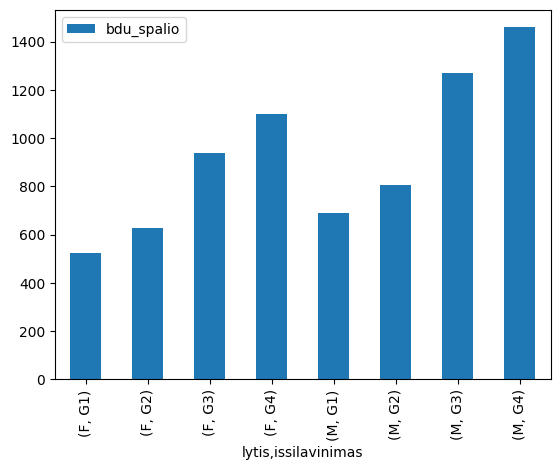

In [ ]:
dugr.mean(numeric_only=True).plot(kind='bar')

<Axes: xlabel='lytis'>

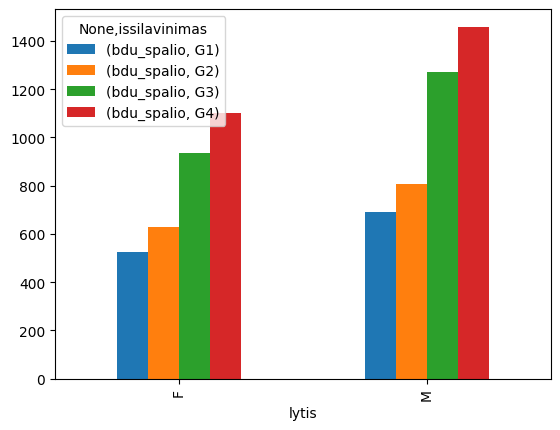

In [ ]:
dugr.mean(numeric_only=True).unstack().plot(kind='bar')

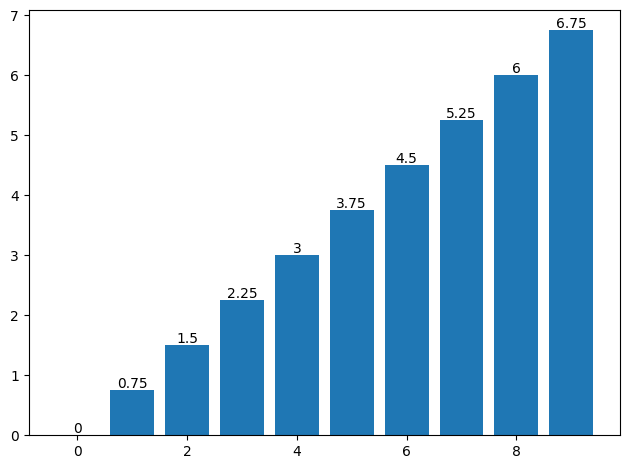

In [ ]:
x=np.arange(0, 10) # ? - list with labels
fig, axis = plt.subplots()
#plotting code:
P = axis.bar(x, x*0.75)
axis.bar_label(P)

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
#  sugrupuokite dus2018 pagal issilavinima, suraskite vidutini atlyginima

dugr = du18.groupby(by=['issilavinimas'])
dugr.mean(numeric_only=True)

,bdu_spalio
issilavinimas,
G1,626.391679
G2,732.687157
G3,1094.764026
G4,1246.451196


In [ ]:
# sugrupuokite pagal amziaus grupes, suraskite vidutini atlyginima
dugr = du18.groupby(by=['amzius'])
dugr.mean(numeric_only=True)

,bdu_spalio
amzius,
14-29,865.563301
30-39,1088.955721
40-49,980.855429
50-59,856.067124
60+,784.542386


In [ ]:
# sugrupuokite pagal amziaus grupes IR issilavinima, 
# atskiriant vyrus ir moteris, suraskite vidutinius atlyginimus
# pritaikytkite ką tik rodytą informaciją ir
# vizualizuokite barais priklausomybę tarp išssilavinimo, amžiaus grupės ir vidutiniio atlyginimo

vyr18 = du18.query('lytis == "M"')
dugrv = vyr18.groupby(by=['amzius', 'issilavinimas'])
dugrv.mean(numeric_only=True).unstack()

bdu_spalio                                      
issilavinimas          G1          G2           G3           G4
amzius                                                         
14-29          682.547826  793.322280  1181.346481  1222.638158
30-39          770.419580  872.228456  1399.738047  1576.256348
40-49          726.116162  835.153790  1312.243326  1642.363208
50-59          664.846154  798.891181  1081.717762  1413.537578
60+            588.522727  712.486520   972.589431  1243.578783

<Axes: xlabel='amzius'>

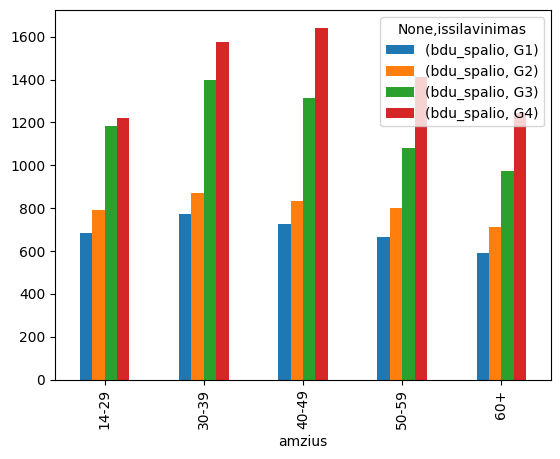

In [ ]:
dugrv.mean(numeric_only=True).unstack().plot(kind='bar')

In [ ]:
mot18 = du18.query('lytis == "F"')
dugrm = mot18.groupby(by=['amzius', 'issilavinimas'])
dugrm.mean(numeric_only=True).unstack()

bdu_spalio                                      
issilavinimas          G1          G2           G3           G4
amzius                                                         
14-29          486.324561  597.760326   893.842186  1006.536000
30-39          652.028169  660.934570  1001.732070  1232.746032
40-49          581.450820  659.756448   972.870837  1188.780938
50-59          513.460432  642.668338   841.646934  1037.370815
60+            413.696629  557.674401   742.876190   968.746193

<Axes: xlabel='amzius'>

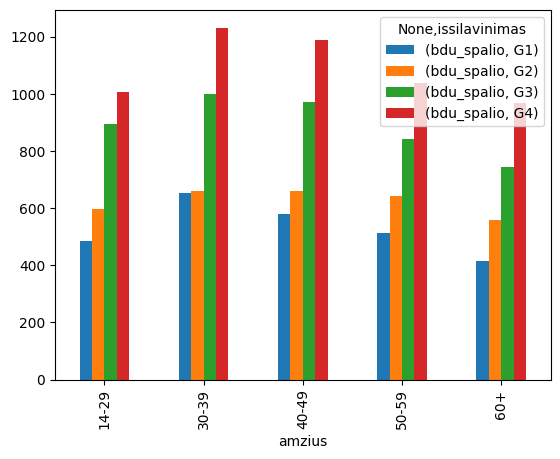

In [ ]:
dugrm.mean(numeric_only=True).unstack().plot(kind='bar')

Index(['G2', 'G3', 'G4', 'G1'], dtype='object', name='issilavinimas')
Išsilavinimo grupė G2 vidutinis atlyginimas 732.6871572212066
Išsilavinimo grupė G3 vidutinis atlyginimas 1094.7640256572408
Išsilavinimo grupė G4 vidutinis atlyginimas 1246.4511960095226
Išsilavinimo grupė G1 vidutinis atlyginimas 626.3916786226686
Amžiaus grupė 50-59 vidutinis atlyginimas 856.0671241050119
Amžiaus grupė 40-49 vidutinis atlyginimas 980.8554293599406
Amžiaus grupė 14-29 vidutinis atlyginimas 865.5633005977796
Amžiaus grupė 30-39 vidutinis atlyginimas 1088.9557207498383
Amžiaus grupė 60+ vidutinis atlyginimas 784.542386341076


<Axes: xlabel='amzius'>

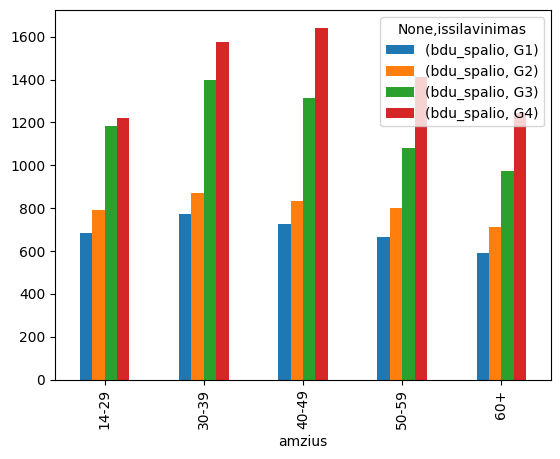

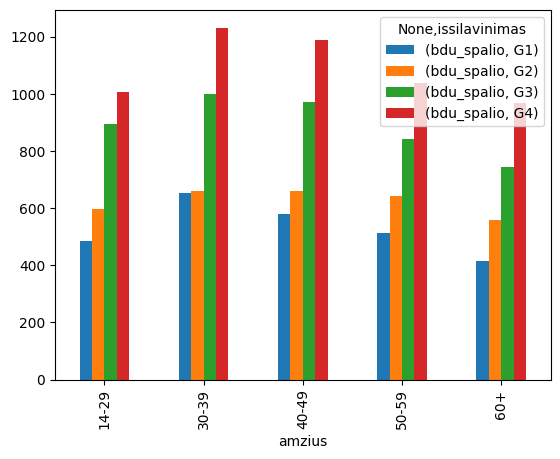

In [ ]:
bydus18=pd.read_csv('DUS2018.csv')
du18=dus18[['lytis', 'issilavinimas', 'bdu_spalio', 'amzius']]
du18.head(5)
issilav_gr = du18['issilavinimas'].value_counts().index
print(issilav_gr)
for issilav in issilav_gr:
    atr_issil = du18.query('issilavinimas==@issilav')
    vid_atl = atr_issil['bdu_spalio'].mean()
    print('Išsilavinimo grupė', issilav, 'vidutinis atlyginimas', vid_atl)
du18.groupby(by='issilavinimas').mean(numeric_only=True)
amz_gr = du18['amzius'].value_counts().index
for amz in amz_gr:
    atr_amz = du18.query('amzius==@amz')
    vid_atl = atr_amz['bdu_spalio'].mean()
    print('Amžiaus grupė', amz, 'vidutinis atlyginimas', vid_atl)
du18.groupby(by='amzius').mean(numeric_only=True)
dugr= du18.query('lytis=="M"').groupby(by=['amzius', 'issilavinimas'])
dugr.groups.keys()
dugr.mean(numeric_only=True).unstack().plot(kind='bar')
dugr= du18.query('lytis=="F"').groupby(by=['amzius', 'issilavinimas'])
dugr.groups.keys()
dugr.mean(numeric_only=True).unstack().plot(kind='bar')

In [ ]:
# sort_values(by=)
# .tail(), .head()

In [ ]:
miestai.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
0,Vilnius,0,1323 m.,1387 m.,16,557440
1,Kaunas,102,1361 m.,1408 m.,13,286763
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898
3,Šiauliai,213,1236 m.,1713 m.,14,100119
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148


In [ ]:
miestai.sort_values(by='Atstumas iki sostinės').tail()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
80,Salantai,311,1556 m.,1950 m.,9,1360
16,Kretinga,314,1253 m.,1609 m.,9,16840
17,Palanga,326,1253 m.,1791–1792 m.,9,15666
47,Skuodas,337,1253 m.,1572 m.,9,5289
60,Neringa,358,1385 m.,1961 m.,9,3464


In [ ]:
amzius = []
def amzius(x):
    return 2024 - float(str(x)[:4])

miestai['Amzius'] = miestai['Paminėjimo metai'].apply(amzius)

In [ ]:
miestai.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,Amzius
0,Vilnius,0,1323 m.,1387 m.,16,557440,701.0
1,Kaunas,102,1361 m.,1408 m.,13,286763,663.0
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898,772.0
3,Šiauliai,213,1236 m.,1713 m.,14,100119,788.0
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148,521.0


In [ ]:
#  suraskite 5kis seniausius ir 5kis naujausius miestus

miestai.sort_values(by='Amzius').head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,Amzius
14,Visaginas,152,1975 m.,1977 m.,10,18185,49.0
68,Venta,268,1966 m.,1978 m.,14,2213,58.0
23,Elektrėnai,48,1960 m.,1962 m.,16,11276,64.0
38,Naujoji Akmenė,269,1952 m.,1952 m.,14,7266,72.0
85,Baltoji Vokė,35,1950 m.,1958 m.,16,1052,74.0


In [ ]:
miestai.sort_values(by='Amzius').tail()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,Amzius
13,Ukmergė,72,1201,1792 m.,16,20391,823.0
57,Švenčionys,84,1201,1800 m.,16,4139,823.0
56,Trakai,27,1201,XIV a. pab. – XV a. pr.,16,4238,823.0
40,Pasvalys,182,1201,1946 m.,11,6490,823.0
78,Ramygala,146,1201,1956 m.,11,1415,823.0


In [ ]:
# Nuskaitykite NYPD faila
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_DATE', 'OCCUR_TIME'])
nypd.head(3)


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-15 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-15 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,193118596,2019-02-02,2024-04-15 19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480


In [ ]:
nypdsmall = nypd[['DATA', 'BORO', 'STATISTICAL_MURDER_FLAG', 'PERP_RACE', 'VIC_RACE']]

In [ ]:
#Suraskite, kiek kieviename rajone (BORO) buvo susišaudymų.

shootings = nypdsmall['BORO'].value_counts().reset_index()
raj = shootings.index
counts = shootings.values
shootings

,BORO,count
0,BROOKLYN,8913
1,BRONX,6195
2,QUEENS,3225
3,MANHATTAN,2647
4,STATEN ISLAND,646


In [ ]:
# prisidėkite stulpelį, kuriame būtų tik įvykio laiko valandos

nypdsmall['HR'] = nypdsmall['DATA'].dt.round('H').dt.hour
nypdsmall.head(3)

,DATA,BORO,STATISTICAL_MURDER_FLAG,PERP_RACE,VIC_RACE,HR
0,2019-08-23 22:10:00,QUEENS,False,NaN,BLACK,22
1,2019-11-27 15:54:00,BRONX,False,BLACK,BLACK,16
2,2019-02-02 19:40:00,MANHATTAN,False,WHITE HISPANIC,BLACK HISPANIC,20


In [ ]:
# Suraskite, kiek ir kokios rasės buvo nusikaltėlių;
nus = nypdsmall['PERP_RACE'].value_counts().reset_index()
rase = nus.index
counts = nus.values
nus

,PERP_RACE,count
0,BLACK,9336
1,UNKNOWN,1839
2,WHITE HISPANIC,1827
3,BLACK HISPANIC,1007
4,WHITE,239
5,ASIAN / PACIFIC ISLANDER,105
6,AMERICAN INDIAN/ALASKAN NATIVE,2


In [ ]:
# Suraskite, kiek ir kokios rasės buvo aukų?
vic = nypdsmall['VIC_RACE'].value_counts().reset_index()
rase = vic.index
counts = vic.values
vic

,VIC_RACE,count
0,BLACK,15470
1,WHITE HISPANIC,3105
2,BLACK HISPANIC,2085
3,WHITE,578
4,ASIAN / PACIFIC ISLANDER,286
5,UNKNOWN,93
6,AMERICAN INDIAN/ALASKAN NATIVE,9


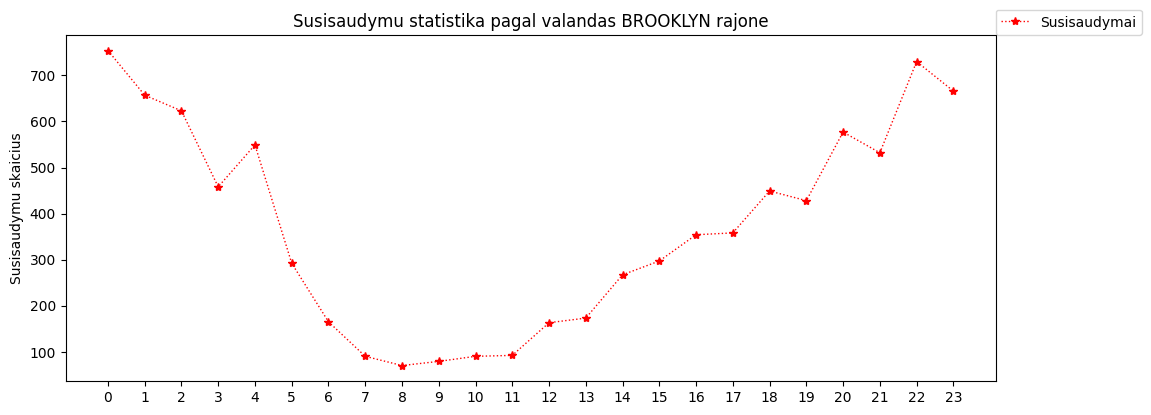

In [ ]:
# nuskaitykite NYPD.
# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.

brooklyn = nypdsmall[nypdsmall['BORO'] == 'BROOKLYN']['HR'].value_counts().sort_index(ascending=True).values
valandos = nypdsmall['HR'].value_counts().sort_index(ascending=True).index

a = valandos
b = brooklyn
fig, ax = plt.subplots(figsize =[12,4.5])
ax.plot(a,b, label = 'Susisaudymai', linestyle=':', color='red', linewidth=1, marker='*')
ax.set_ylabel('Susisaudymu skaicius')
ax.set_title('Susisaudymu statistika pagal valandas BROOKLYN rajone')
ax.set_xticks(a)
ax.legend(loc=[1,1])
plt.show()

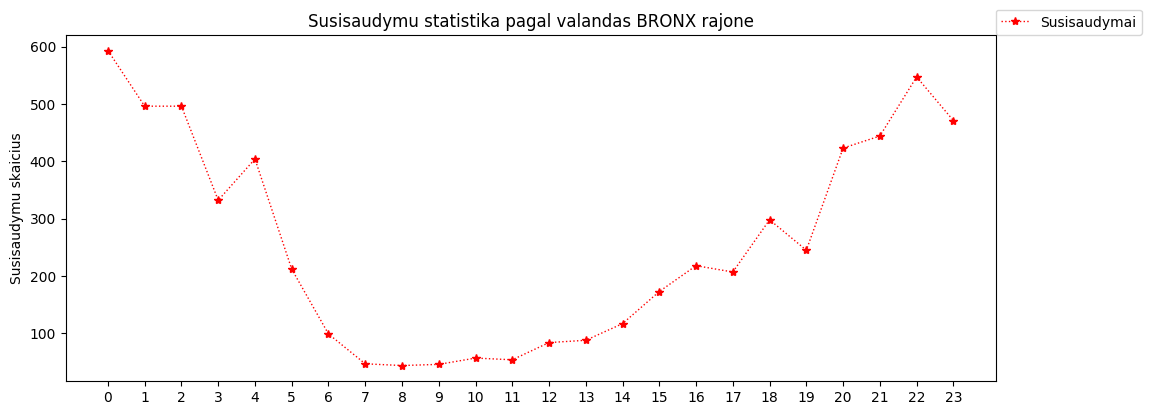

In [ ]:
bronx = nypdsmall[nypdsmall['BORO'] == 'BRONX']['HR'].value_counts().sort_index(ascending=True).values
valandos = nypdsmall['HR'].value_counts().sort_index(ascending=True).index

a = valandos
b = bronx
fig, ax = plt.subplots(figsize =[12,4.5])
ax.plot(a,b, label = 'Susisaudymai', linestyle=':', color='red', linewidth=1, marker='*')
ax.set_ylabel('Susisaudymu skaicius')
ax.set_title('Susisaudymu statistika pagal valandas BRONX rajone')
ax.set_xticks(a)
ax.legend(loc=[1,1])
plt.show()

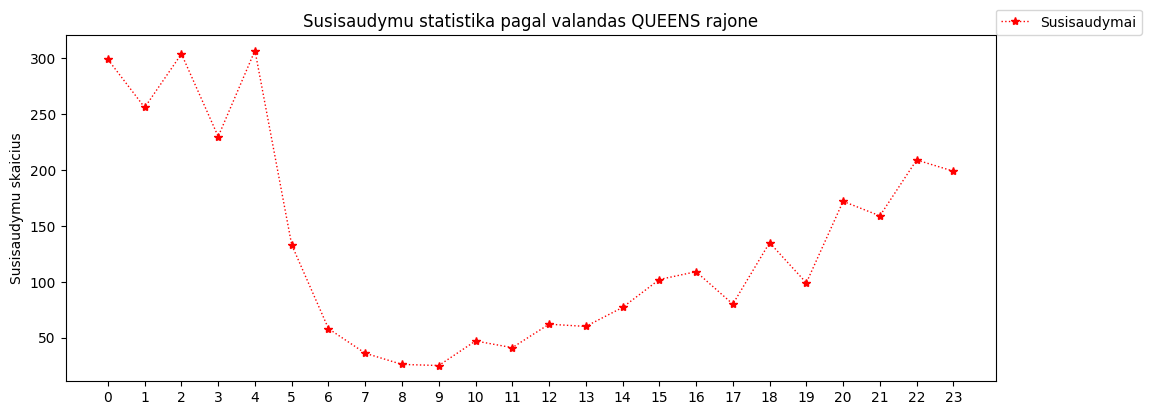

In [ ]:
queens = nypdsmall[nypdsmall['BORO'] == 'QUEENS']['HR'].value_counts().sort_index(ascending=True).values
valandos = nypdsmall['HR'].value_counts().sort_index(ascending=True).index

a = valandos
b = queens
fig, ax = plt.subplots(figsize =[12,4.5])
ax.plot(a,b, label = 'Susisaudymai', linestyle=':', color='red', linewidth=1, marker='*')
ax.set_ylabel('Susisaudymu skaicius')
ax.set_title('Susisaudymu statistika pagal valandas QUEENS rajone')
ax.set_xticks(a)
ax.legend(loc=[1,1])
plt.show()

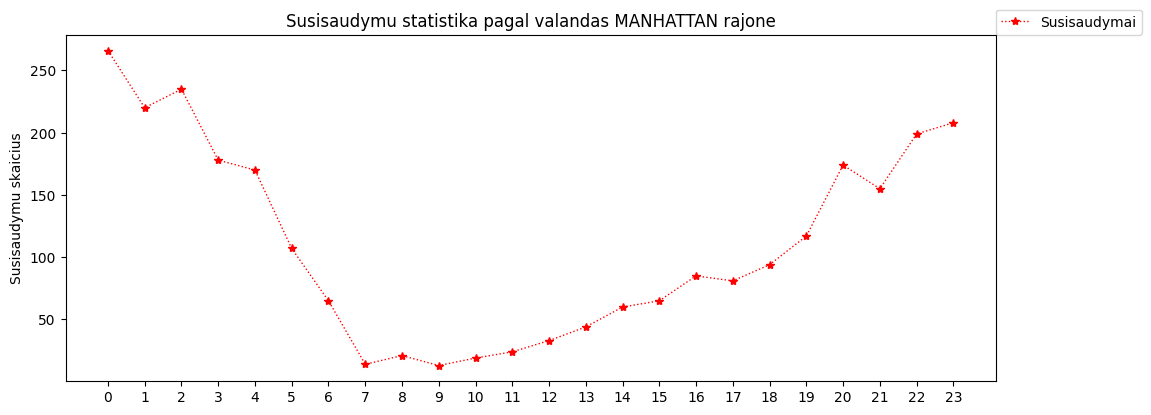

In [ ]:
manhattan = nypdsmall[nypdsmall['BORO'] == 'MANHATTAN']['HR'].value_counts().sort_index(ascending=True).values
valandos = nypdsmall['HR'].value_counts().sort_index(ascending=True).index

a = valandos
b = manhattan
fig, ax = plt.subplots(figsize =[12,4.5])
ax.plot(a,b, label = 'Susisaudymai', linestyle=':', color='red', linewidth=1, marker='*')
ax.set_ylabel('Susisaudymu skaicius')
ax.set_title('Susisaudymu statistika pagal valandas MANHATTAN rajone')
ax.set_xticks(a)
ax.legend(loc=[1,1])
plt.show()

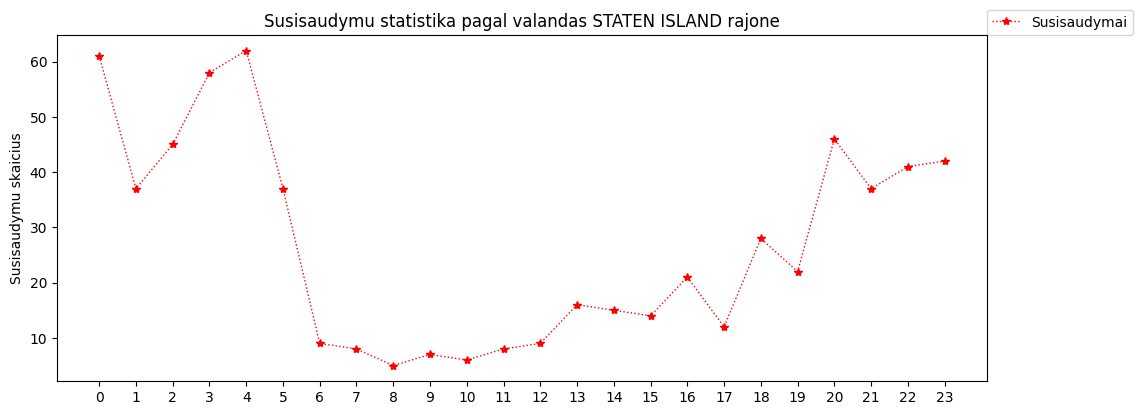

In [ ]:
statenisland = nypdsmall[nypdsmall['BORO'] == 'STATEN ISLAND']['HR'].value_counts().sort_index(ascending=True).values
valandos = nypdsmall['HR'].value_counts().sort_index(ascending=True).index

a = valandos
b = statenisland
fig, ax = plt.subplots(figsize =[12,4.5])
ax.plot(a,b, label = 'Susisaudymai', linestyle=':', color='red', linewidth=1, marker='*')
ax.set_ylabel('Susisaudymu skaicius')
ax.set_title('Susisaudymu statistika pagal valandas STATEN ISLAND rajone')
ax.set_xticks(a)
ax.legend(loc=[1,1])
plt.show()

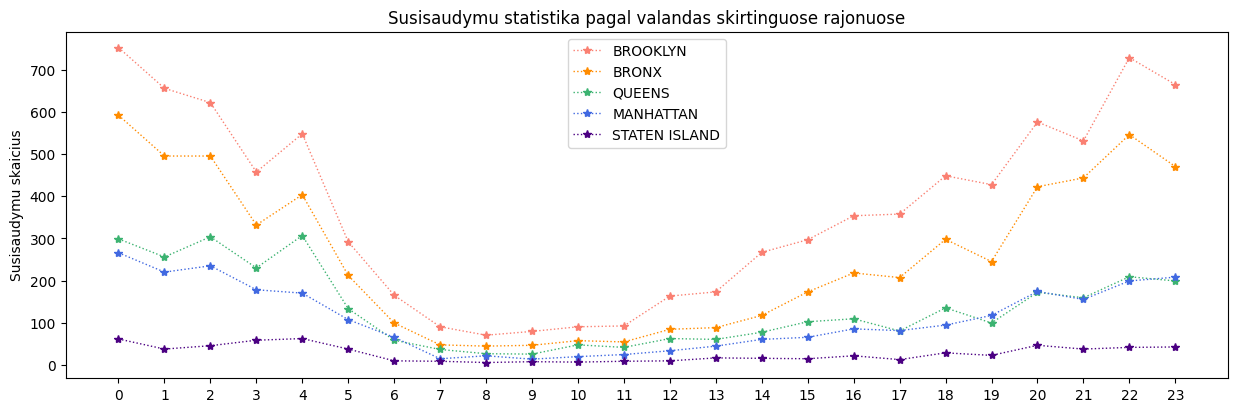

In [ ]:
# nuskaitykite NYPD.
# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.

brooklyn = nypdsmall[nypdsmall['BORO'] == 'BROOKLYN']['HR'].value_counts().sort_index(ascending=True).values
bronx = nypdsmall[nypdsmall['BORO'] == 'BRONX']['HR'].value_counts().sort_index(ascending=True).values
queens = nypdsmall[nypdsmall['BORO'] == 'QUEENS']['HR'].value_counts().sort_index(ascending=True).values
manhattan = nypdsmall[nypdsmall['BORO'] == 'MANHATTAN']['HR'].value_counts().sort_index(ascending=True).values
statenisland = nypdsmall[nypdsmall['BORO'] == 'STATEN ISLAND']['HR'].value_counts().sort_index(ascending=True).values
valandos = nypdsmall['HR'].value_counts().sort_index(ascending=True).index

a = valandos
b = brooklyn
c = bronx
d = queens
e = manhattan
f = statenisland

fig, ax = plt.subplots(figsize =[15,4.5])
ax.plot(a,b, label = 'BROOKLYN', linestyle=':', color='salmon', linewidth=1, marker='*')
ax.plot(a,c, label = 'BRONX', linestyle=':', color='darkorange', linewidth=1, marker='*')
ax.plot(a,d, label = 'QUEENS', linestyle=':', color='mediumseagreen', linewidth=1, marker='*')
ax.plot(a,e, label = 'MANHATTAN', linestyle=':', color='royalblue', linewidth=1, marker='*')
ax.plot(a,f, label = 'STATEN ISLAND', linestyle=':', color='indigo', linewidth=1, marker='*')
ax.set_ylabel('Susisaudymu skaicius')
ax.set_title('Susisaudymu statistika pagal valandas skirtinguose rajonuose')
ax.set_xticks(a)
ax.legend(loc='best')
plt.show()

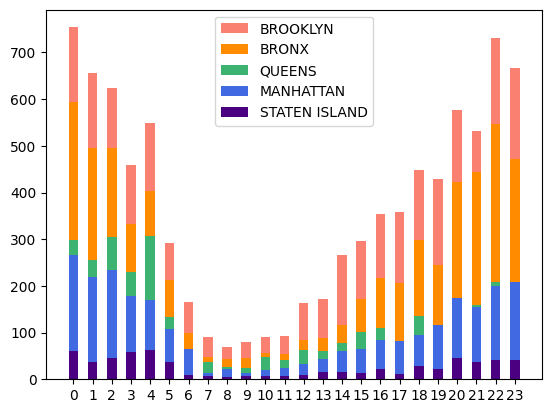

In [ ]:
a = valandos
b = brooklyn
c = bronx
d = queens
e = manhattan
f = statenisland

fig, ax = plt.subplots()

ax.bar(a,b, color ='salmon', width=0.5, label = 'BROOKLYN')
ax.bar(a,c, color ='darkorange', width=0.5, label = 'BRONX')
ax.bar(a,d, color ='mediumseagreen', width=0.5, label = 'QUEENS')
ax.bar(a,e, color ='royalblue', width=0.5, label = 'MANHATTAN')
ax.bar(a,f, color ='indigo', width=0.5, label = 'STATEN ISLAND')
ax.legend(loc='best')
ax.set_xticks(a) #paliekami tik tie dydziai, kurie yra isvardinti a funkcijoje

plt.show()

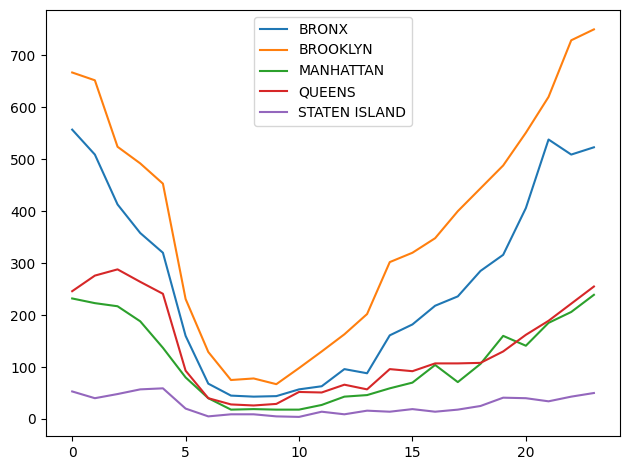

In [ ]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])
nypd['H'] = nypd['OCCUR_TIME'].dt.hour
nypd = nypd[['BORO', 'PERP_RACE','VIC_RACE','H']]

nypdgr = nypd.groupby('BORO')

fig, axis = plt.subplots()
#plotting code:
for group in nypdgr.groups.keys():
    h = nypdgr.get_group(group)['H'].value_counts().sort_index()
    axis.plot(h.index, h.values, label=group)  #gali buti ir axis.bar ar axis.scatter

axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [24]:
A = nypdsmall.query('BORO == "BRONX"').value_counts().sort_index(ascending=True).reset_index() #reset_index() padaro normalia lentele
A

In [ ]:
# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.
# Rodo tik vieno ajono statistika
A = nypdsmall.query('BORO == "BRONX"').value_counts().sort_index(ascending=True).reset_index()
valandos= A['HR'].values
skaicius= A['count'].values
B = nypdsmall.query('BORO == "BROOKLYN"').value_counts().sort_index(ascending=True).reset_index()
valandosBrooklyn= B['HR'].values
skaiciusBrooklyn= B['count'].values
langas, grafikas = plt.subplots()
grafikas.plot(valandos, skaicius, label='Susišaudymų skaičius Bronxe', linewidth=2, color= 'red', linestyle="-")
grafikas.plot(valandosBrooklyn, skaiciusBrooklyn, label='Susišaudymų skaičius Brooklyne', linewidth=2, color= 'magenta', linestyle="dashdot")
grafikas.set_xlabel("Valandos")
grafikas.set_ylabel("Susišaudymų skaičius")
grafikas.set_title("NYPD užfiksuotų susišaudymų skaičius rajonuose")
grafikas.legend(loc=[1.05,0.5])
plt.show()